<a href="https://colab.research.google.com/github/serithemage/DataScienctPractice/blob/main/PyCaret%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyCaret 튜토리얼

## PyCaret이란?
PyCaret은 본질적으로 scikit-learn , XGBoost , Microsoft LightGBM , spaCy 등과 같은 여러 기계 학습 라이브러리 및 프레임워크를 좀 더 간편하게 사용할 수 있게 해 주는 Python래퍼 입니다. 

PyCaret은 다음의 분들에게 적합합니다.
- 생산성을 높이고자 하는 숙련된 데이터 과학자
- 로우코드 머신러닝 솔루션을 선호하는 시민 데이터 과학자(Citizen Data Scientists)
- 데이터 과학을 배우려는 학생
- 개념 증명 프로젝트 구축에 관련된 데이터 과학자 및 컨설턴트

![](https://i2.wp.com/pycaret.org/wp-content/uploads/2020/07/pycaret2-features.png?resize=1033%2C613&ssl=1)

맨 먼저 pycaret을 설치해 줍니다. Colab의 경우 에러가 표시되지만 사용에는 문제가 없으므로 무시해도 됩니다.

In [ ]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.4 MB/s 
     |████████████████████████████████| 1.7 MB 34.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 28.6 MB/s 
     |████████████████████████████████| 2.0 MB 34.9 MB/s 
     |████████████████████████████████| 6.8 MB 38.2 MB/s 
     |████████████████████████████████| 15.5 MB 19.4 MB/s 
     |████████████████████████████████| 167 kB 41.1 MB/s 
     |████████████████████████████████| 261 kB 41.6 MB/s 
     |████████████████████████████████| 113 kB 52.1 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 3.1 MB 43.8 MB/s 
     |████████████████████████████████| 10.1 MB 37.1 MB/s 
     |████████████████████████████████| 303 kB 45.5 MB/s 
     |████████████████

이제 모듈을 임포트 해 줘야 합니다. 여기서는 회귀를 수행하기때문에 해당 모듈만 가졍옵시다.  
그 다음엔 기계학습 공부에 사용할 데이터를 편리하게 가져올 수 있는 get_data 모듈을 임포트 합니다.

In [ ]:
from pycaret.regression import *
from pycaret.datasets import get_data

PyCaret는 기계학습 공부에 사용할 수 있는 다양한 [데이터셋](https://pycaret.org/get-data/)을 제공합니다.

여기서는 다이아몬드의 가격을 예측하는 데이터셋을 사용해 보겠습니다. 다이아몬드는 무게, 색, 가공등에 따라 감정되고 이에 대해 가격이 책정됩니다.  
다이아몬드 데이터셋의 상세는 [여기](https://www.kaggle.com/shivam2503/diamonds)에서 살펴볼 수 있습니다.

In [ ]:
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


이제 학습을 위해 데이터를 설정합시다. 종속변수만 지정해 주면 됩니다. 나머지 특성들이 범주형인지 수치형인지도 알아서 설정해 주기때문에 매우 편리합니다.  
PyCaret이 추론해준 데이터 형에 문제가 없다면 엔터키를 눌러 다음으로 넘어갑시다.

In [ ]:
exp = setup(dataset, target='Price', use_gpu = True)

,Description,Value
0,session_id,1943
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 28)"


이제 모형을 만들 차례입니다. PyCaret에서 사용 가능한 모형은 어떤것이 있을까 알아봅시다.

In [ ]:
models(internal=True)[['Name', 'GPU Enabled']]

,Name,GPU Enabled
ID,,
lr,Linear Regression,False
lasso,Lasso Regression,False
ridge,Ridge Regression,False
en,Elastic Net,False
lar,Least Angle Regression,False
llar,Lasso Least Angle Regression,False
omp,Orthogonal Matching Pursuit,False
br,Bayesian Ridge,False
ard,Automatic Relevance Determination,False



PyCaret는 다음의 단 한 줄로 가장 잘 작동하는 모형을 찾아 줍니다!

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.270462e+02,2.286295e+06,1.490447e+03,9.777000e-01,0.0784,0.0579,2.505
rf,Random Forest Regressor,7.285754e+02,2.562260e+06,1.570497e+03,9.752000e-01,0.0785,0.0569,2.084
gbr,Gradient Boosting Regressor,9.000989e+02,3.062341e+06,1.742312e+03,9.698000e-01,0.1018,0.0770,0.316
lightgbm,Light Gradient Boosting Machine,7.528041e+02,3.258251e+06,1.751822e+03,9.685000e-01,0.0777,0.0560,0.102
dt,Decision Tree Regressor,9.197421e+02,3.747990e+06,1.911584e+03,9.636000e-01,0.1016,0.0723,0.027
lr,Linear Regression,2.437163e+03,1.415436e+07,3.744113e+03,8.620000e-01,0.6847,0.2871,0.022
ridge,Ridge Regression,2.419882e+03,1.419949e+07,3.750409e+03,8.616000e-01,0.6803,0.2833,0.029
lasso,Lasso Regression,2.415783e+03,1.421295e+07,3.751394e+03,8.615000e-01,0.6685,0.2824,0.070
br,Bayesian Ridge,2.419356e+03,1.422508e+07,3.753309e+03,8.614000e-01,0.6806,0.2831,0.036
llar,Lasso Least Angle Regression,2.358743e+03,1.424954e+07,3.755460e+03,8.612000e-01,0.6765,0.2686,0.021


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1943, verbose=0, warm_start=False)

여러 모형들의 결과가 나왔습니다. 가장 성능이 좋은 모형순으로 정렬이 되므로 맨 위에 표시된 Extra Trees Regressor을 사용해 보겠습니다.


In [ ]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,792.7034,2.708217e+06,1645.6660,0.9752,0.0807,0.0583
1,702.0434,1.675916e+06,1294.5719,0.9844,0.0766,0.0564
2,799.3964,2.711135e+06,1646.5523,0.9769,0.0797,0.0603
3,722.8477,1.971971e+06,1404.2688,0.9812,0.0850,0.0599
4,599.5572,1.142322e+06,1068.7946,0.9877,0.0683,0.0522
5,735.6920,2.675265e+06,1635.6237,0.9752,0.0781,0.0577
6,726.0610,1.820393e+06,1349.2193,0.9802,0.0786,0.0593
7,746.5846,1.871732e+06,1368.1125,0.9776,0.0820,0.0618
8,700.6726,4.219581e+06,2054.1620,0.9598,0.0780,0.0553
9,744.9037,2.066416e+06,1437.5032,0.9788,0.0765,0.0573


표시된 내용은 교차 검증을 10회 수행한 결과와 그 평균(Mean) 및 표준편차(Standard Deviation)입니다.  

잠시 하이퍼파라미터를 포함해 모형의 상세를 살펴보겠습니다.

In [ ]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=4533, verbose=0, warm_start=False)

이제 시각화를 통해 모형이 잘 만들어 졌는지 확인해 보겠습니다.

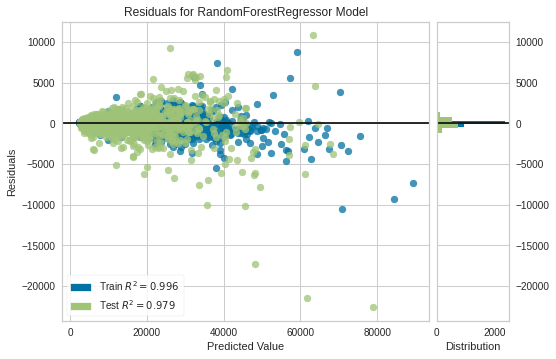

In [ ]:
plot_model(model)

만들어진 모형을 대상으로 하이퍼파라미터 최적화를 수행해 보겠습니니다. 이 작업은 40분 정도의 시간이 걸립니다.

In [ ]:
tuned_model = tune_model(model)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:47:27
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.9min


최적화가 수행된 이후의 하이퍼파미터의 내용을 살펴봅시다.

In [ ]:
tuned_model

실제 모형이 수행한 다이아몬드 가격 예측 결과를 살펴봅시다. Price는 실제 가격이고 Label은 모형이 추론한 가격 입니다.

In [ ]:
predict_model(tuned_model)

예측치와 실제 가격의 차이가 크진 않은것 같지만 눈으로 파악하기는 어렵습니다.  
아까와 마찬가지로 시각화를 통해 모형의 성능을 확인해 보겠습니다.

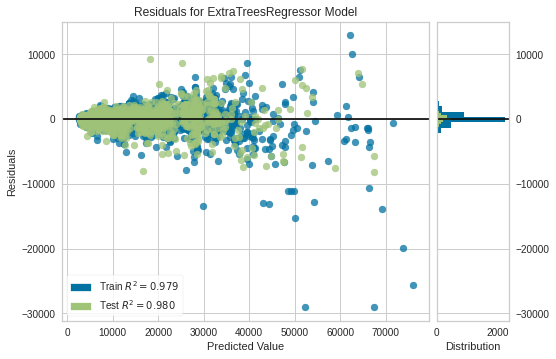

In [ ]:
plot_model(tuned_model)

파란색 점은 학습에 의해 예측된 값이고 녹색은 테스트에 의해 예측된 값 입니다. 0에 가까울 수록 좀 더 정확하게 맞췄다고 볼 수 있는데 튜닝 후에 좀 더 분산이 좋아진 것을 알 수 있습니다.  
그럼 어떤 특성이 가격에 가장 큰 영향을 미쳤는지 살펴봅시다. plot_model에 plot='feature'를 추가해 주는것 만으로 끝납니다.

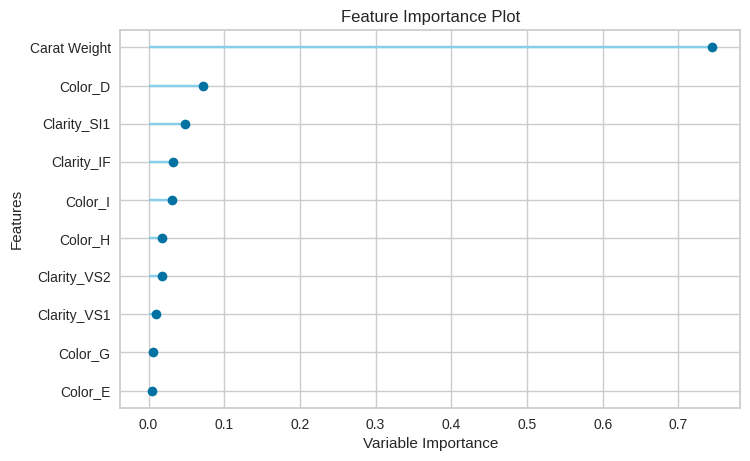

In [ ]:
plot_model(tuned_model, plot='feature')

어떻습니까? 정말 몇 줄 안되는 코드로 모형을 만들고 검증까지 수행했습니다.

예를 하나 더 들어보겠습니다. Capstone Project로 잘 알려져 있는 적금상품 권유 텔레마케팅 모델을 PyCaret으로 만들어 보겠습니다.

우선 데이터를 다운 받아 pandas data frame으로 읽어들입니다.